<a href="https://colab.research.google.com/github/tomorrownow/intro-to-geoprocessing-workshop/blob/main/geoprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash

apt-get install grass grass-doc
# leave the directory with source code
cd ~

# download sample data
mkdir -p grassdata
curl -SL https://grass.osgeo.org/sampledata/north_carolina/nc_basic_spm_grass7.zip > nc_basic_spm_grass7.zip
unzip -qq nc_basic_spm_grass7.zip
mv nc_basic_spm_grass7 grassdata
rm nc_basic_spm_grass7.zip


In [9]:
import os
os.chdir(os.path.expanduser("~"))

# Intro to Geoprocessing with the GRASS GIS Geoprocessing Engine

This notebook is an introduction to geoprocessing with [GRASS GIS](https://grass.osgeo.org). We aim to introduce you to the basics concepts of Geographic Information Systems (GIS) and how to use GRASS GIS to perform geoprocessing tasks.


## What is GIS?  
GIS is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data. GIS applications are tools that allow users to create interactive queries (user-created searches), analyze spatial information, edit data in maps, and present the results of all these operations.

## Geospatial data?

Geospatial data is data that is associated with a particular location on the surface of the Earth. This data can be represented in many forms, such as points, lines, polygons, and rasters. Geospatial data can be used to answer questions such as "Where is the nearest hospital?" or "What is the average temperature in this region?".

### Vector Data

Vector data is represented as points, lines, and polygons on a map. Points are used to represent specific locations, such as the location of a tree or a building. Lines are used to represent linear features, such as roads or rivers. Polygons are used to represent areas, such as the boundaries of a city or a forest.

In [20]:
!g.list type=vector

boundary_region
boundary_state
census
elev_points
firestations
geology
geonames
hospitals
points_of_interest
railroads
roadsmajor
schools
streams
streets
zipcodes


### Rasters Data

Raster are a way of representing spatial data in a grid format. Each cell in the grid has a value that represents a particular attribute. For example, a raster could represent the temperature of the Earth's surface, with each cell representing the temperature at a particular location.

In [22]:
!g.list type=raster

aspect
basins
dx
dy
elevation
elevation_shade
geology
lakes
landuse
slope
soils


### Coordinate Reference Systems


### Where can I get geospatial data?

#### Online Data Portals

* [NC OneMap](https://www.nconemap.gov/)
* [Durham OpenData Portal](https://live-durhamnc.opendata.arcgis.com/)


## Spatial Temporal Scale

Spatial scale reprents the resolution (i.e., grain) of each pixel and the total extent (i.e., area) of the raster. The temporal scale represents the time period (i.e., extent) and the frequency (i.e., grain) of the data collection.

In [ ]:
gs.parse_command("g.region", raster="elevation", flags="p")

## What is Geoprocessing?

## Introduction to GRASS GIS Geoprocessing Engine

### Durham, NC Open Data Portal



## Configuring GRASS GIS

In [ ]:
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint
import json
import time

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
print(gisbase)

# Ask GRASS GIS where its Python packages are.
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

!grass -c -e ~/grassdata/nc_basic_spm_grass7/tutorial

# Start GRASS Session
## Set your grass data location
gj.init("~/grassdata", "nc_basic_spm_grass7", "tutorial")

### Create a new Project (Location and Mapset)

### Importing Data

### Setting the Region

In [ ]:
gs.parse_command("g.region", raster="elevation", flags="p")

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
  File "/usr/lib/grass83/etc/python/grass/script/utils.py", line 159, in __getattr__
    return self[key]
KeyError: 'shape'


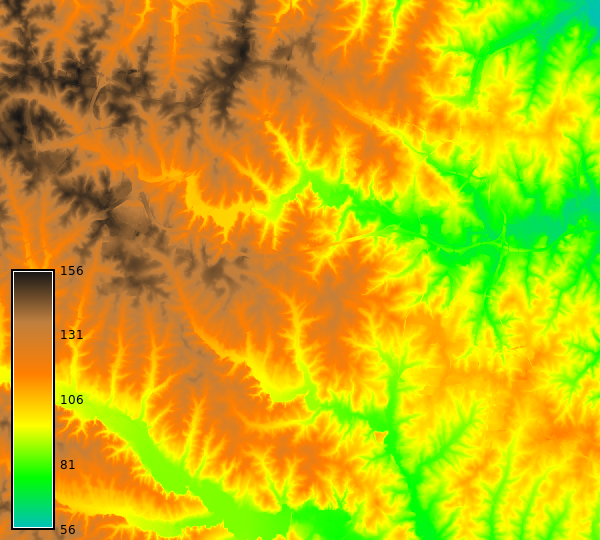

In [19]:
dem_map = gj.Map()

dem_map.d_rast(map="elevation")
dem_map.d_legend(raster="elevation", at=(2,50,2,9))
dem_map.show()

#### Slope and Aspect

In [ ]:
!r.slope.aspect elevation=elevation slope=slope aspect=aspect dx=dx dy=dy

#### Geomorphon

#### Watershed Analysis

In [ ]:
r.watershed -b elevation=dem_mosaic@workshop_prep threshold=10000 accumulation=accum10k tci=tci10k drainage=direction10k basin=basins10k stream=streams10k memory=30000

#### Heigh Above the Nearest Drainage (HAND)

#### SIMWE

In [ ]:
r.sim.water -t elevation=dem_mosaic@workshop_prep dx=dx@workshop_prep dy=dy@workshop_prep depth=depth discharge=disch error=sim_error walkers_output=walkers nwalkers=100000 niterations=30 random_seed=2 nprocs=24

#### Solar Radiation

In [ ]:
r.sun elevation=dem_mosaic@workshop_prep aspect=aspect@workshop_prep slope=slope@workshop_prep glob_rad=g172 insol_time=its172 day=172 nprocs=30

### Geomorphometry